In [ ]:
# Importing necessary libraries
import pandas as pd # Used for data manipulation and analysis
import numpy as np # Used for numerical computations and handling arrays
import matplotlib.pyplot as plt # Used for creating static visualizations (plots and charts)
import seaborn as sns  # Used for creating advanced, aesthetically pleasing visualizations


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/power consumption project/powerconsumption.csv')# reading csv file

In [ ]:
data.head()# first five rows of data_set

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.info()# Displaying a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
print(data.shape)

(52416, 13)


In [ ]:
data.describe()# Displaying summary statistics of numerical columns in the DataFrame

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
data.isnull().sum()# checking the null values

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


In [ ]:
# Convert 'Datetime' to datetime format
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Extract temporal features
data['DayOfWeek'] = data['Datetime'].dt.dayofweek
data['Month'] = data['Datetime'].dt.month
data['Hour'] = data['Datetime'].dt.hour
data['Quarter'] = data['Datetime'].dt.quarter

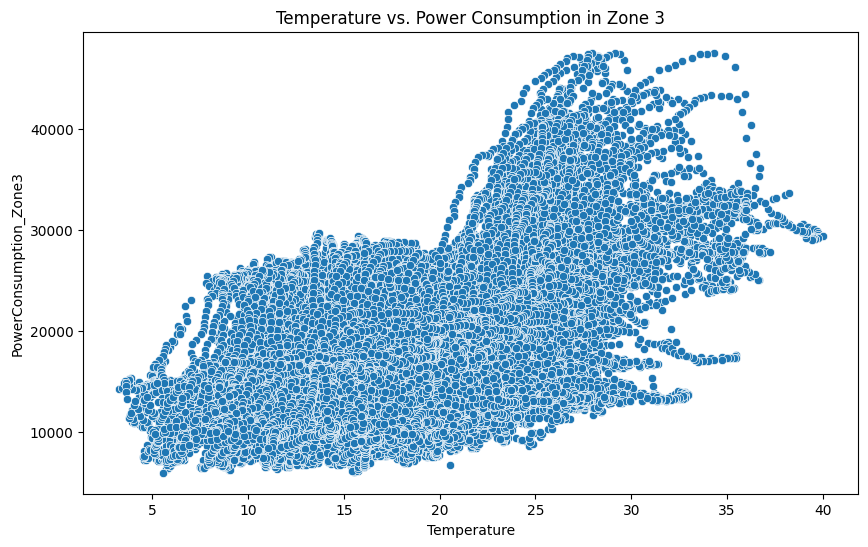

In [ ]:
# Temperature vs. Power Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='PowerConsumption_Zone3', data=data)
plt.title('Temperature vs. Power Consumption in Zone 3')
plt.show()

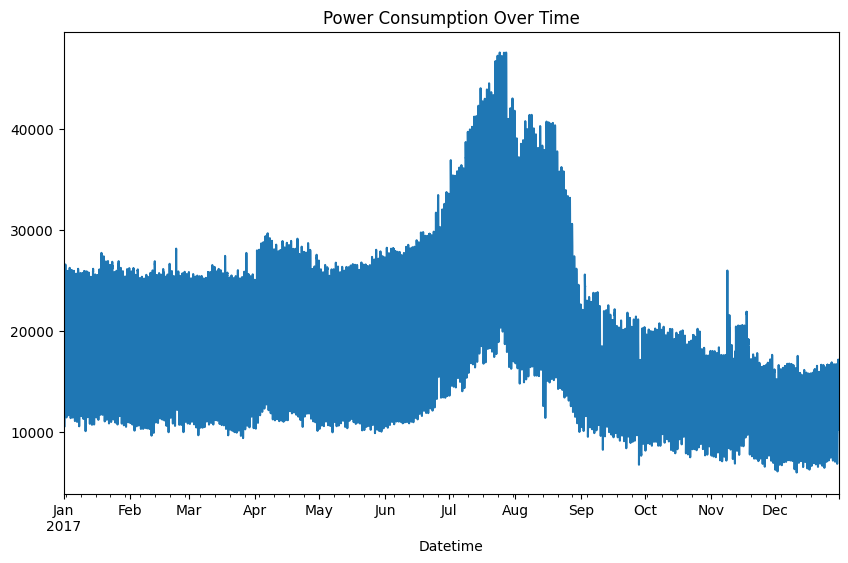

In [ ]:
# Power Consumption Over Time
data.groupby('Datetime')['PowerConsumption_Zone3'].mean().plot(figsize=(10, 6))
plt.title('Power Consumption Over Time')
plt.show()

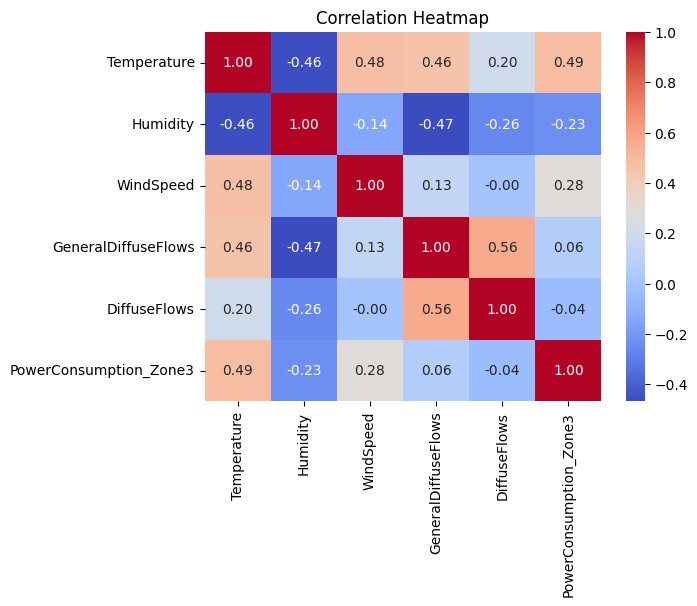

In [ ]:
# Correlation heatmap
corr = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone3']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Select features and target
X = data[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'DayOfWeek', 'Month', 'Hour', 'Quarter']]
y = data['PowerConsumption_Zone3']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")
print(f"Model Accuracy: {r2 * 100:.2f}%")

MAE: 468.48796562789875, RMSE: 749.7371476983354, R²: 0.9871090028057636
Model Accuracy: 98.71%


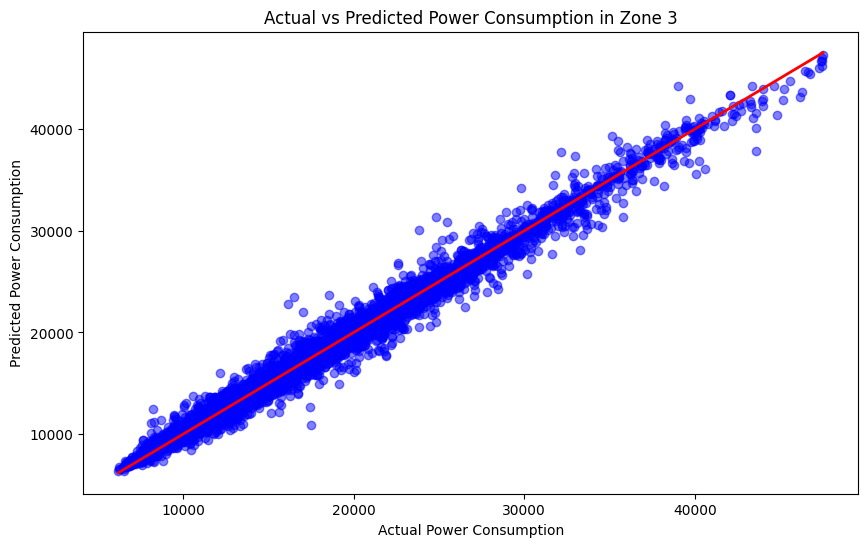

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Power Consumption in Zone 3')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.show()

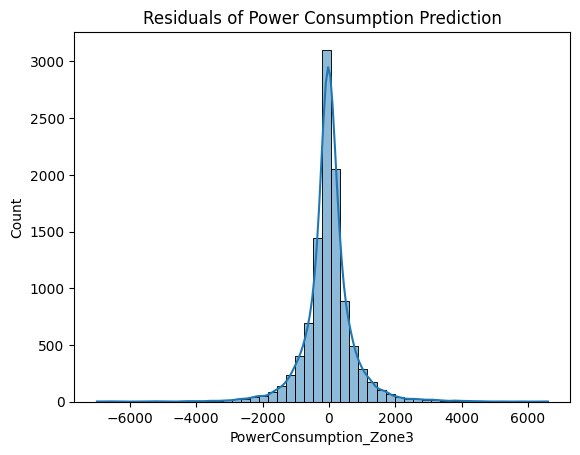

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residuals of Power Consumption Prediction')
plt.show()

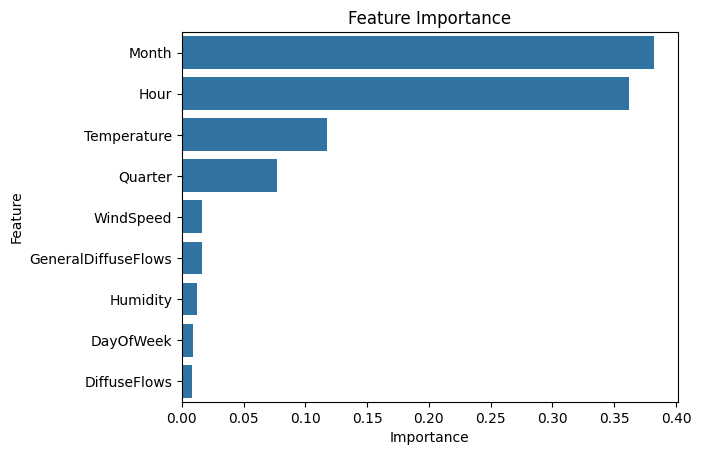

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()